In [1]:
import pandas as pd
import requests
import io
import os as os
import datetime

In [2]:
dayz = 1
current_day = datetime.date.today()
yester_day = current_day - datetime.timedelta(days=dayz)
yester_str = datetime.date.strftime(yester_day,"%m-%d-%Y")
yester_year = datetime.date.strftime(yester_day,"%Y")
yester_str

'09-23-2020'

In [3]:
#Select which countries to plot.
selections = {'US','Brazil','Mexico','United Kingdom','Iran','Canada','Russia','Germany','Korea, South','Egypt','Japan','Pakistan','Nigeria','India','China'}

#### Gathering Info

In [4]:
# Downloading the csv file from GitHub

url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/\
csse_covid_19_daily_reports/"\
    + str(yester_str)\
    + ".csv"

url2 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/\
csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

download1 = requests.get(url1).content
download2 = requests.get(url2).content

# Reading the downloaded content and turning it into a pandas dataframe

df_cov = pd.read_csv(io.StringIO(download1.decode('utf-8')))
df_tsded = pd.read_csv(io.StringIO(download2.decode('utf-8')))
df_pop = pd.read_csv('population_total.csv')


# Printing out the first 5 rows of the dataframe

print (df_cov.head())
print (df_tsded.head())
print (df_pop.head())

   FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2020-09-24 04:23:38  33.93911   
1   NaN    NaN            NaN        Albania  2020-09-24 04:23:38  41.15330   
2   NaN    NaN            NaN        Algeria  2020-09-24 04:23:38  28.03390   
3   NaN    NaN            NaN        Andorra  2020-09-24 04:23:38  42.50630   
4   NaN    NaN            NaN         Angola  2020-09-24 04:23:38 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      39145    1446      32610   5089.0  Afghanistan   
1  20.168300      12787     370       7139   5278.0      Albania   
2   1.659600      50400    1698      35428  13274.0      Algeria   
3   1.521800       1753      53       1203    497.0      Andorra   
4  17.873900       4363     159       1473   2731.0       Angola   

   Incidence_Rate  Case-Fatality_Ratio  
0      100.556559             3.693958  
1      444.332476             2.89

In [5]:
print("Checking URL is legit:\n\n" + url1 + "\n\n" + url2)

Checking URL is legit:

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-23-2020.csv

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [6]:
df_tsded
TS = df_tsded.columns.to_list()
TS = TS[4:len(TS)]
#TS

In [7]:
w_pop = df_pop['2020'].sum()
print('World Population: ' + str(w_pop))
d_tol = df_cov['Deaths'].sum()
print('World Deaths: ' + str(d_tol))
TD_tol = list()
for i in range(4,df_tsded.shape[1]):
    TD_tol = TD_tol + [df_tsded.iloc[:,i].sum()]
print('World Deaths from Time Series: ' + str(TD_tol[len(TD_tol)-dayz]))

World Population: 7756508609
World Deaths: 975104
World Deaths from Time Series: 975104


In [8]:
countries = list(df_cov.Country_Region.unique()) #unique countries from JH
coln = ['Confirmed','Deaths','Recovered','Active'] #columns from JH to be extracted

In [9]:
temp_dict = dict()   #blank dict
for j in coln:            #for columns wanted in JH
    temp_list = list()    #blank list
    for i in countries:   #for unique countries in JH
        temp_df = df_cov.loc[df_cov.Country_Region == i]  #pull rows by country 
        temp_list = temp_list + [temp_df[j].sum()] #sum rows into one country pop for each column add to temp list
        continue
    temp_dict[j] = temp_list   #save sum in dictionary

In [10]:
temp_dict2 = dict()
for j in TS:
    temp_list2 = list()
    for i in countries: 
        temp_df3 = df_tsded.loc[df_tsded['Country/Region'] == i]
        temp_list2 = temp_list2 + [temp_df3[j].sum()]
        continue
    temp_dict2[j] = temp_list2

In [11]:
print('May Need to Reformat GapMinder Names for:')
for i in countries:  #for unique countries in JH
    cnam = i in df_pop.country.values   #check if JH country name is in GapMinder pop
    if cnam == False:  #if it isn't in GapMinder print countries that may need to be renamed to match JH
        print(i)
        print(cnam)

May Need to Reformat GapMinder Names for:
Burma
False
Cabo Verde
False
Czechia
False
Diamond Princess
False
Kosovo
False
Laos
False
MS Zaandam
False
Saint Kitts and Nevis
False
Saint Lucia
False
Saint Vincent and the Grenadines
False
Slovakia
False
Taiwan*
False
West Bank and Gaza
False
Western Sahara
False


In [12]:
#can use later if you want to pull gapminder from web renames example
#df_pop['country'] = df_pop['country'].replace(['Zambia'],'ZZZ')

In [13]:
count_pop = list()   #blank list for country populations
for i in countries:  #for unique JH countries
    exists = i in df_pop.country.values  #check if (after reformating GM data) if JH name is in GM pops
    if exists == False: #if it doesn't then
        temp_df2 = 'M'   #put an M string in temp list
        count_pop = count_pop + list(temp_df2)  #add M to count_pop column (similar to an NA)
    temp_df2 = df_pop[yester_year].loc[df_pop.country == i] #pull population for JH name out of gapminder
    count_pop = count_pop + list(temp_df2) #add the GM total pop to the df for JH
len(count_pop)  #check number of countries that are listed in new Population list

188

In [14]:
df_cov1 = pd.DataFrame(temp_dict)  #create df out of JH data
df_covTS = pd.DataFrame(temp_dict2)
df_covTS

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
183        0        0        0        0        0        0        0        0   
184        0        0        0        0        0        0        0        0   
185        0        0        0        0        0        0        0        0   
186        0        0        0        0        0        0        0        0   
187        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  9/14/20  9/15/20  9/16/20  9/17/20  9/18/20  \
0          0        0  ...     1425     1426     1436     1436     1437   
1          0        0  ...      338      340      343      347      353   
2          0        0  ...     1620     1632     1645     1654     1659   
3          0        0  ...       53       53       53       53       53   
4          0        0  ...      136      139      143      144      147   
..       ...      ...  ...      ...      ...      ...      ...      ...   
183        0        0  ...      226      229      243      244      250   
184        0        0  ...        1        1        1        1        1   
185        0        0  ...      583      583      583      585      585   
186        0        0  ...      320      324      326      326      329   
187        0        0  ...      224      224      224      224      224   

     9/19/20  9/20/20  9/21/20  9/22/20  9/23/20  
0       1437     1441     1444     1445     1446  
1        358      362      364      367      370  
2       1665     1672     1679     1689     1698  
3         53       53       53       53       53  
4        147      152      154      155      159  
..       ...      ...      ...      ...      ...  
183      253      262      265      269      272  
184        1        1        1        1        1  
185      585      586      586      586      586  
186      330      330      331      331      332  
187      225      225      225      226      227  

[188 rows x 246 columns]

In [15]:
df_cov1.insert(0,'Country',countries) #insert unqique country name list into JH (because JH is broke into regions)
df_covTS.insert(0,'Country',countries) #samesies
df_cov1  #display 

Country  Confirmed  Deaths  Recovered   Active
0           Afghanistan      39145    1446      32610   5089.0
1               Albania      12787     370       7139   5278.0
2               Algeria      50400    1698      35428  13274.0
3               Andorra       1753      53       1203    497.0
4                Angola       4363     159       1473   2731.0
..                  ...        ...     ...        ...      ...
183  West Bank and Gaza      37083     272      26288  10523.0
184      Western Sahara         10       1          8      1.0
185               Yemen       2029     586       1245    198.0
186              Zambia      14443     332      13629    482.0
187            Zimbabwe       7725     227       6007   1491.0

[188 rows x 5 columns]

In [16]:
df_cov1['Population'] = count_pop #add pop column to JH dataframe and insert count_pop sum populations
df_covTS['Population'] = count_pop

In [17]:
df_cov19 = df_cov1.loc[df_cov1['Population'] != 'M'] #get rid of rows containing the "M" flag (more will appear if renamed in GM data)
df_cov19.reset_index(inplace = True, drop = True) #reset indext with M rows missing, drop old index
df_covTS = df_covTS.loc[df_cov1['Population'] != 'M']
df_covTS.reset_index(inplace = True, drop = True)
df_covTS

Country  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   
..           ...      ...      ...      ...      ...      ...      ...   
169    Venezuela        0        0        0        0        0        0   
170      Vietnam        0        0        0        0        0        0   
171        Yemen        0        0        0        0        0        0   
172       Zambia        0        0        0        0        0        0   
173     Zimbabwe        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  9/15/20  9/16/20  9/17/20  9/18/20  \
0          0        0        0  ...     1426     1436     1436     1437   
1          0        0        0  ...      340      343      347      353   
2          0        0        0  ...     1632     1645     1654     1659   
3          0        0        0  ...       53       53       53       53   
4          0        0        0  ...      139      143      144      147   
..       ...      ...      ...  ...      ...      ...      ...      ...   
169        0        0        0  ...      502      511      520      530   
170        0        0        0  ...       35       35       35       35   
171        0        0        0  ...      583      583      585      585   
172        0        0        0  ...      324      326      326      329   
173        0        0        0  ...      224      224      224      224   

     9/19/20  9/20/20  9/21/20  9/22/20  9/23/20  Population  
0       1437     1441     1444     1445     1446    38900000  
1        358      362      364      367      370     2880000  
2       1665     1672     1679     1689     1698    43900000  
3         53       53       53       53       53       77300  
4        147      152      154      155      159    32900000  
..       ...      ...      ...      ...      ...         ...  
169      539      547      555      564      574    28400000  
170       35       35       35       35       35    97300000  
171      585      586      586      586      586    29800000  
172      330      330      331      331      332    18400000  
173      225      225      225      226      227    14900000  

[174 rows x 248 columns]

In [18]:
df_covTS = df_covTS.set_index('Country').T
df_covTS.reset_index(inplace = True)

In [19]:
df_covTS = df_covTS.rename(columns = {'index':'Date'})
df_covTS

Country        Date Afghanistan  Albania   Algeria Andorra    Angola  \
0           1/22/20           0        0         0       0         0   
1           1/23/20           0        0         0       0         0   
2           1/24/20           0        0         0       0         0   
3           1/25/20           0        0         0       0         0   
4           1/26/20           0        0         0       0         0   
..              ...         ...      ...       ...     ...       ...   
242         9/20/20        1441      362      1672      53       152   
243         9/21/20        1444      364      1679      53       154   
244         9/22/20        1445      367      1689      53       155   
245         9/23/20        1446      370      1698      53       159   
246      Population    38900000  2880000  43900000   77300  32900000   

Country Antigua and Barbuda Argentina  Armenia Australia  ...   Ukraine  \
0                         0         0        0         0  ...         0   
1                         0         0        0         0  ...         0   
2                         0         0        0         0  ...         0   
3                         0         0        0         0  ...         0   
4                         0         0        0         0  ...         0   
..                      ...       ...      ...       ...  ...       ...   
242                       3     13053      930       851  ...      3626   
243                       3     13482      936       854  ...      3652   
244                       3     13952      938       859  ...      3716   
245                       3     14376      942       861  ...      3784   
246                   97900  45200000  2960000  25500000  ...  43700000   

Country United Arab Emirates United Kingdom  Uruguay Uzbekistan Venezuela  \
0                          0              0        0          0         0   
1                          0              0        0          0         0   
2                          0              0        0          0         0   
3                          0              0        0          0         0   
4                          0              0        0          0         0   
..                       ...            ...      ...        ...       ...   
242                      404          41866       46        433       547   
243                      405          41877       46        437       555   
244                      405          41914       46        442       564   
245                      406          41951       47        444       574   
246                  9890000       67900000  3470000   33500000  28400000   

Country   Vietnam     Yemen    Zambia  Zimbabwe  
0               0         0         0         0  
1               0         0         0         0  
2               0         0         0         0  
3               0         0         0         0  
4               0         0         0         0  
..            ...       ...       ...       ...  
242            35       586       330       225  
243            35       586       331       225  
244            35       586       331       226  
245            35       586       332       227  
246      97300000  29800000  18400000  14900000  

[247 rows x 175 columns]

In [20]:
df_covTS.iloc[12,1::]
df_covTS.shape[1]

175

In [21]:
df_covTS

Country        Date Afghanistan  Albania   Algeria Andorra    Angola  \
0           1/22/20           0        0         0       0         0   
1           1/23/20           0        0         0       0         0   
2           1/24/20           0        0         0       0         0   
3           1/25/20           0        0         0       0         0   
4           1/26/20           0        0         0       0         0   
..              ...         ...      ...       ...     ...       ...   
242         9/20/20        1441      362      1672      53       152   
243         9/21/20        1444      364      1679      53       154   
244         9/22/20        1445      367      1689      53       155   
245         9/23/20        1446      370      1698      53       159   
246      Population    38900000  2880000  43900000   77300  32900000   

Country Antigua and Barbuda Argentina  Armenia Australia  ...   Ukraine  \
0                         0         0        0         0  ...         0   
1                         0         0        0         0  ...         0   
2                         0         0        0         0  ...         0   
3                         0         0        0         0  ...         0   
4                         0         0        0         0  ...         0   
..                      ...       ...      ...       ...  ...       ...   
242                       3     13053      930       851  ...      3626   
243                       3     13482      936       854  ...      3652   
244                       3     13952      938       859  ...      3716   
245                       3     14376      942       861  ...      3784   
246                   97900  45200000  2960000  25500000  ...  43700000   

Country United Arab Emirates United Kingdom  Uruguay Uzbekistan Venezuela  \
0                          0              0        0          0         0   
1                          0              0        0          0         0   
2                          0              0        0          0         0   
3                          0              0        0          0         0   
4                          0              0        0          0         0   
..                       ...            ...      ...        ...       ...   
242                      404          41866       46        433       547   
243                      405          41877       46        437       555   
244                      405          41914       46        442       564   
245                      406          41951       47        444       574   
246                  9890000       67900000  3470000   33500000  28400000   

Country   Vietnam     Yemen    Zambia  Zimbabwe  
0               0         0         0         0  
1               0         0         0         0  
2               0         0         0         0  
3               0         0         0         0  
4               0         0         0         0  
..            ...       ...       ...       ...  
242            35       586       330       225  
243            35       586       331       225  
244            35       586       331       226  
245            35       586       332       227  
246      97300000  29800000  18400000  14900000  

[247 rows x 175 columns]

In [22]:
df_cov19['Deaths'] / d_tol  #double check  what the deaths per country / total world deaths looks like

0      0.001483
1      0.000379
2      0.001741
3      0.000054
4      0.000163
         ...   
169    0.000589
170    0.000036
171    0.000601
172    0.000340
173    0.000233
Name: Deaths, Length: 174, dtype: float64

In [23]:
#The MEAT and the BONES
df_cov19.insert(len(df_cov19.columns),'Countr/World Deaths', df_cov19['Deaths'] / d_tol)
df_cov19.insert(len(df_cov19.columns),'Countr/World Pop', df_cov19['Population'] / w_pop)
df_cov19.insert(len(df_cov19.columns),'Death Gap', df_cov19['Countr/World Deaths'] - df_cov19['Countr/World Pop'])
df_cov19.insert(len(df_cov19.columns),'Death Ratio', df_cov19['Deaths'] / df_cov19['Population'])
df_cov19.insert(len(df_cov19.columns),'Confirmed Ratio', df_cov19['Confirmed'] / df_cov19['Population'])
df_cov19

Country  Confirmed  Deaths  Recovered   Active Population  \
0    Afghanistan      39145    1446      32610   5089.0   38900000   
1        Albania      12787     370       7139   5278.0    2880000   
2        Algeria      50400    1698      35428  13274.0   43900000   
3        Andorra       1753      53       1203    497.0      77300   
4         Angola       4363     159       1473   2731.0   32900000   
..           ...        ...     ...        ...      ...        ...   
169    Venezuela      69439     574      58759  10106.0   28400000   
170      Vietnam       1069      35        991     43.0   97300000   
171        Yemen       2029     586       1245    198.0   29800000   
172       Zambia      14443     332      13629    482.0   18400000   
173     Zimbabwe       7725     227       6007   1491.0   14900000   

     Countr/World Deaths Countr/World Pop    Death Gap  Death Ratio  \
0               0.001483       0.00501514  -0.00353222  3.71722e-05   
1               0.000379      0.000371301  8.14563e-06  0.000128472   
2               0.001741       0.00565976  -0.00391841  3.86788e-05   
3               0.000054      9.96582e-06  4.43874e-05   0.00068564   
4               0.000163        0.0042416  -0.00407854  4.83283e-06   
..                   ...              ...          ...          ...   
169             0.000589       0.00366144  -0.00307279  2.02113e-05   
170             0.000036        0.0125443   -0.0125084  3.59712e-07   
171             0.000601       0.00384193  -0.00324097  1.96644e-05   
172             0.000340        0.0023722  -0.00203172  1.80435e-05   
173             0.000233       0.00192097  -0.00168817  1.52349e-05   

    Confirmed Ratio  
0         0.0010063  
1        0.00443993  
2        0.00114806  
3         0.0226779  
4       0.000132614  
..              ...  
169      0.00244504  
170     1.09866e-05  
171     6.80872e-05  
172     0.000784946  
173     0.000518456  

[174 rows x 11 columns]

In [24]:
#create data frame just for plotting
df_plot = df_cov19.reset_index(inplace = True)
df_plot = df_cov19.set_index('Country')

In [25]:
df_plot

index  Confirmed  Deaths  Recovered   Active Population  \
Country                                                                
Afghanistan      0      39145    1446      32610   5089.0   38900000   
Albania          1      12787     370       7139   5278.0    2880000   
Algeria          2      50400    1698      35428  13274.0   43900000   
Andorra          3       1753      53       1203    497.0      77300   
Angola           4       4363     159       1473   2731.0   32900000   
...            ...        ...     ...        ...      ...        ...   
Venezuela      169      69439     574      58759  10106.0   28400000   
Vietnam        170       1069      35        991     43.0   97300000   
Yemen          171       2029     586       1245    198.0   29800000   
Zambia         172      14443     332      13629    482.0   18400000   
Zimbabwe       173       7725     227       6007   1491.0   14900000   

             Countr/World Deaths Countr/World Pop    Death Gap  Death Ratio  \
Country                                                                       
Afghanistan             0.001483       0.00501514  -0.00353222  3.71722e-05   
Albania                 0.000379      0.000371301  8.14563e-06  0.000128472   
Algeria                 0.001741       0.00565976  -0.00391841  3.86788e-05   
Andorra                 0.000054      9.96582e-06  4.43874e-05   0.00068564   
Angola                  0.000163        0.0042416  -0.00407854  4.83283e-06   
...                          ...              ...          ...          ...   
Venezuela               0.000589       0.00366144  -0.00307279  2.02113e-05   
Vietnam                 0.000036        0.0125443   -0.0125084  3.59712e-07   
Yemen                   0.000601       0.00384193  -0.00324097  1.96644e-05   
Zambia                  0.000340        0.0023722  -0.00203172  1.80435e-05   
Zimbabwe                0.000233       0.00192097  -0.00168817  1.52349e-05   

            Confirmed Ratio  
Country                      
Afghanistan       0.0010063  
Albania          0.00443993  
Algeria          0.00114806  
Andorra           0.0226779  
Angola          0.000132614  
...                     ...  
Venezuela        0.00244504  
Vietnam         1.09866e-05  
Yemen           6.80872e-05  
Zambia          0.000784946  
Zimbabwe        0.000518456  

[174 rows x 11 columns]

In [26]:
df_plt_sel = df_plot.loc[selections]

In [27]:
df_plt_sel.reset_index(inplace = True)
df_plt_sel = df_plt_sel.sort_values('Death Gap', ascending = False)
df_plt_sel

Country  index  Confirmed  Deaths  Recovered     Active  \
1               US    162    6933548  201884    2670256  4061020.0   
10          Brazil     23    4591364  138105    4046827   382513.0   
14          Mexico    106     710049   74949     601611    33489.0   
7   United Kingdom    166     412245   41951       2247   368047.0   
13            Iran     77     432798   24840     365846    42112.0   
9           Canada     30     149939    9294     129850    10796.0   
12          Russia    133    1117487   19720     920602   177165.0   
11         Germany     62     279025    9423     245706    23896.0   
5     Korea, South     87      23341     393      20832     2116.0   
3            Egypt     49     102375    5822      91843     4710.0   
0            Japan     83      80009    1525      71547     6937.0   
2         Pakistan    123     308217    6437     294392     7388.0   
4          Nigeria    119      57724    1102      48985     7637.0   
8            India     75    5646010   90020    4587613   968377.0   
6            China     34      90409    4738      85304      367.0   

    Population  Countr/World Deaths Countr/World Pop   Death Gap  Death Ratio  \
1    331000000             0.207038        0.0426738    0.164365  0.000609921   
10   213000000             0.141631        0.0274608     0.11417   0.00064838   
14   129000000             0.076863        0.0166312   0.0602314     0.000581   
7     67900000             0.043022       0.00875394   0.0342681  0.000617835   
13    84000000             0.025474        0.0108296   0.0146446  0.000295714   
9     37700000             0.009531       0.00486043  0.00467086  0.000246525   
12   146000000             0.020223        0.0188229  0.00140058  0.000135068   
11    83800000             0.009664        0.0108038 -0.00114025  0.000112446   
5     51300000             0.000403        0.0066138 -0.00621077  7.66082e-06   
3    102000000             0.005971        0.0131502  -0.0071796  5.70784e-05   
0    126000000             0.001564        0.0162444  -0.0146805  1.21032e-05   
2    221000000             0.006601        0.0284922  -0.0218909  2.91267e-05   
4    206000000             0.001130        0.0265583  -0.0254282  5.34951e-06   
8   1380000000             0.092318         0.177915  -0.0855967  6.52319e-05   
6   1440000000             0.004859         0.185651   -0.180792  3.29028e-06   

   Confirmed Ratio  
1        0.0209473  
10       0.0215557  
14      0.00550426  
7       0.00607135  
13      0.00515236  
9       0.00397716  
12      0.00765402  
11      0.00332965  
5       0.00045499  
3       0.00100368  
0      0.000634992  
2       0.00139465  
4      0.000280214  
8       0.00409131  
6       6.2784e-05

In [28]:
df_plt_2 = df_plt_sel
df_plt_2.insert(len(df_plt_2.columns),'(DR)/(Pop/WPop)', df_plt_2['Death Ratio'] / df_plt_2['Countr/World Pop'] )
df_plt_2.insert(len(df_plt_2.columns), '[Countr/WorldD]/[Countr/WorldP]',df_plt_2['Countr/World Deaths'] / df_plt_2['Countr/World Pop'])
df_plt_2 = df_plt_2.sort_values('[Countr/WorldD]/[Countr/WorldP]', ascending = True)
df_plt_2

Country  index  Confirmed  Deaths  Recovered     Active  \
6            China     34      90409    4738      85304      367.0   
4          Nigeria    119      57724    1102      48985     7637.0   
5     Korea, South     87      23341     393      20832     2116.0   
0            Japan     83      80009    1525      71547     6937.0   
2         Pakistan    123     308217    6437     294392     7388.0   
3            Egypt     49     102375    5822      91843     4710.0   
8            India     75    5646010   90020    4587613   968377.0   
11         Germany     62     279025    9423     245706    23896.0   
12          Russia    133    1117487   19720     920602   177165.0   
9           Canada     30     149939    9294     129850    10796.0   
13            Iran     77     432798   24840     365846    42112.0   
14          Mexico    106     710049   74949     601611    33489.0   
1               US    162    6933548  201884    2670256  4061020.0   
7   United Kingdom    166     412245   41951       2247   368047.0   
10          Brazil     23    4591364  138105    4046827   382513.0   

    Population  Countr/World Deaths Countr/World Pop   Death Gap  Death Ratio  \
6   1440000000             0.004859         0.185651   -0.180792  3.29028e-06   
4    206000000             0.001130        0.0265583  -0.0254282  5.34951e-06   
5     51300000             0.000403        0.0066138 -0.00621077  7.66082e-06   
0    126000000             0.001564        0.0162444  -0.0146805  1.21032e-05   
2    221000000             0.006601        0.0284922  -0.0218909  2.91267e-05   
3    102000000             0.005971        0.0131502  -0.0071796  5.70784e-05   
8   1380000000             0.092318         0.177915  -0.0855967  6.52319e-05   
11    83800000             0.009664        0.0108038 -0.00114025  0.000112446   
12   146000000             0.020223        0.0188229  0.00140058  0.000135068   
9     37700000             0.009531       0.00486043  0.00467086  0.000246525   
13    84000000             0.025474        0.0108296   0.0146446  0.000295714   
14   129000000             0.076863        0.0166312   0.0602314     0.000581   
1    331000000             0.207038        0.0426738    0.164365  0.000609921   
7     67900000             0.043022       0.00875394   0.0342681  0.000617835   
10   213000000             0.141631        0.0274608     0.11417   0.00064838   

   Confirmed Ratio (DR)/(Pop/WPop) [Countr/WorldD]/[Countr/WorldP]  
6       6.2784e-05      1.7723e-05                       0.0261727  
4      0.000280214     0.000201425                        0.042553  
5       0.00045499      0.00115831                       0.0609383  
0      0.000634992     0.000745066                       0.0962752  
2       0.00139465      0.00102227                         0.23169  
3       0.00100368      0.00434048                        0.454033  
8       0.00409131     0.000366646                         0.51889  
11      0.00332965        0.010408                        0.894459  
12      0.00765402      0.00717575                         1.07441  
9       0.00397716       0.0507208                           1.961  
13      0.00515236       0.0273061                         2.35227  
14      0.00550426       0.0349344                         4.62159  
1        0.0209473       0.0142926                         4.85165  
7       0.00607135        0.070578                          4.9146  
10       0.0215557       0.0236111                         5.15757

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

In [30]:
%matplotlib inline

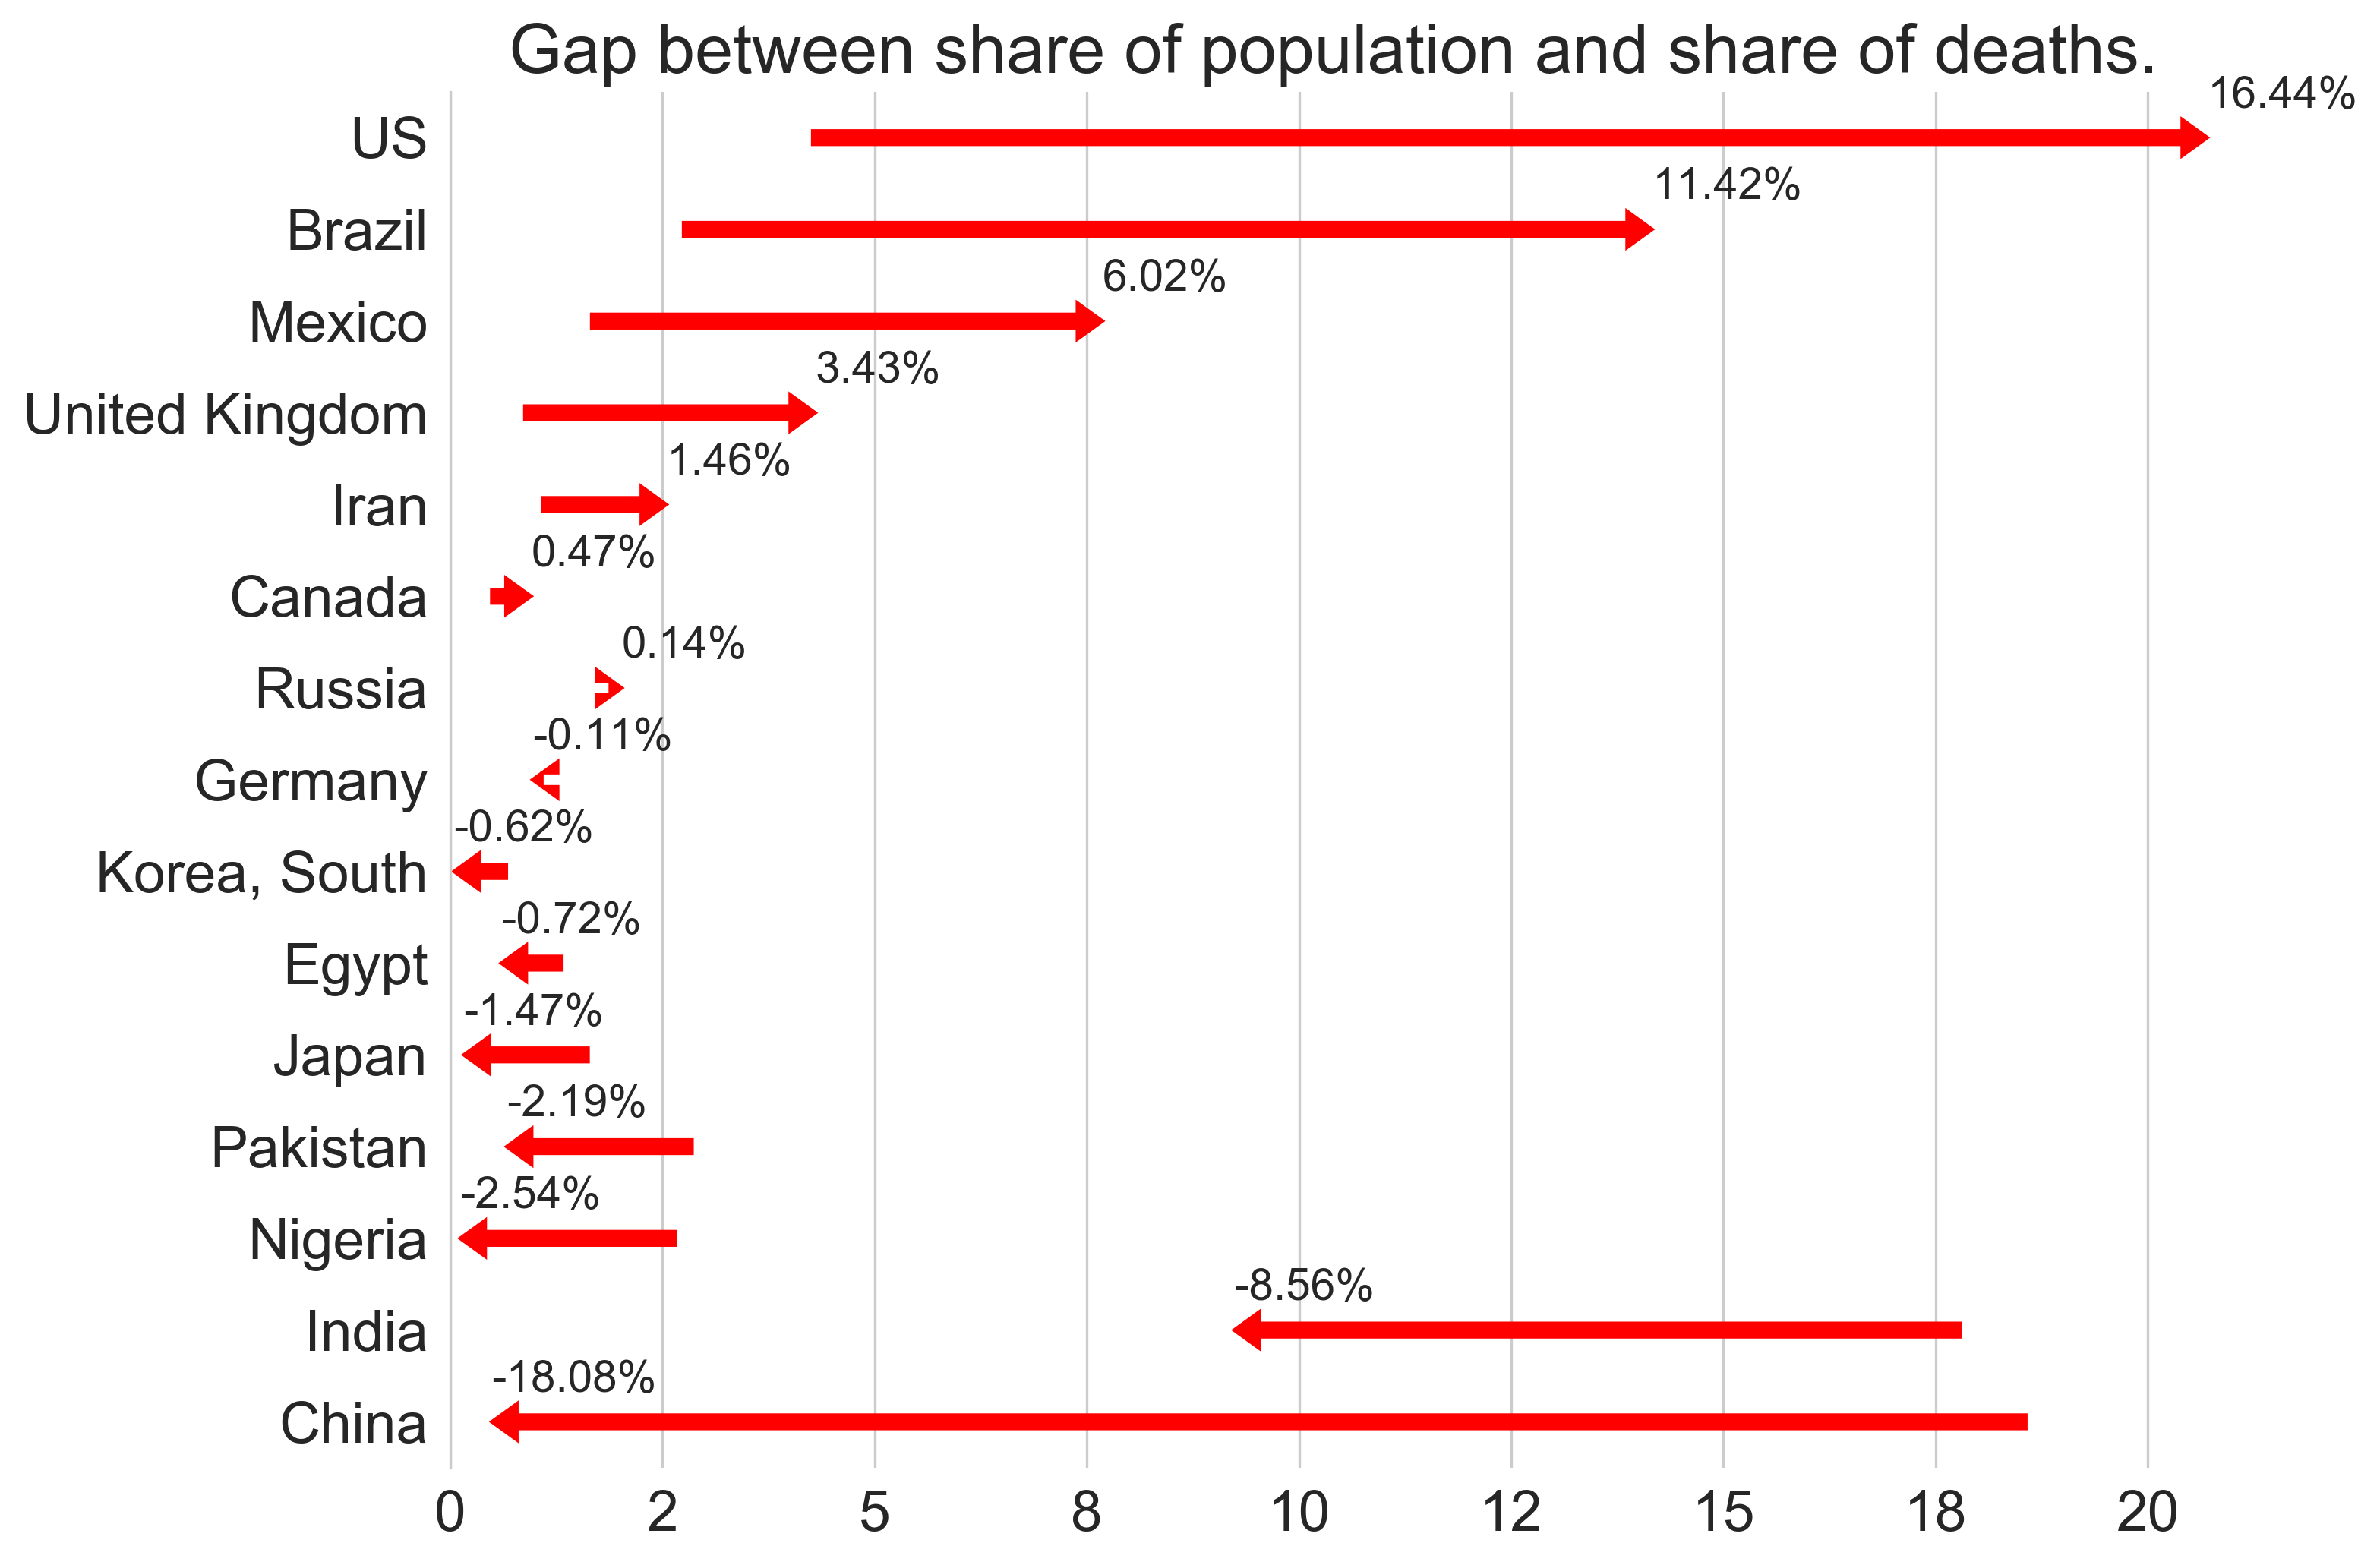

In [31]:
plt.rc('font', size = 18)
sns.set_style('whitegrid')

cplt = plt.figure(figsize = (10,8), dpi = 300)
cplt = sns.stripplot(data = df_plt_sel, 
                     x = 'Countr/World Pop',
                     y = 'Country', 
                     orient = 'h',
                     marker = 's',
                     color = 'red',
                     size = .001
                    )

arr_beg = df_plt_sel['Countr/World Pop'].values
arr_end = df_plt_sel['Death Gap'].values
arr_max = max(df_plt_sel['Countr/World Pop'].values + df_plt_sel['Death Gap'].values) +.001

for i, poo in enumerate(df_plt_sel['Country']):
    cplt.arrow(arr_beg[i], i,
               arr_end[i], 0,
               head_width = .4,
               head_length = .003,
               width = .15,
               length_includes_head = True,
               fc = "red",
               ec = "red"
              )

cplt.set_xlim(0,arr_max)
xlabels = ["{:.0f}".format(x) for x in cplt.get_xticks()*100]
cplt.set_xticklabels(xlabels)
cplt.set_xlabel('')
cplt.set_ylabel('')
cplt.set_title('Gap between share of population and share of deaths.')
sns.despine(bottom = True)
for i, poo in enumerate(df_plt_sel['Country']):
    cplt.text(arr_end[i]+arr_beg[i],i-.33,"{:.2%}".format(arr_end[i]), fontsize = 14)

In [32]:
max_ded = df_plt_2['Deaths'].max()
max_pop_2 = df_plt_2['Population'].max()
sclr = np.floor(np.log10(max_pop_2)) - np.ceil(np.log10(max_ded))
scale_population = df_plt_2['Population'].values / 10**(sclr)
scale_population

array([1440000.0, 206000.0, 51300.0, 126000.0, 221000.0, 102000.0,
       1380000.0, 83800.0, 146000.0, 37700.0, 84000.0, 129000.0, 331000.0,
       67900.0, 213000.0], dtype=object)

In [33]:
df_plt_scale = df_plt_2
df_plt_scale.insert(len(df_plt_scale.columns),'Scale Population', scale_population)
df_plt_scale.sort_values('Deaths')

Country  index  Confirmed  Deaths  Recovered     Active  \
5     Korea, South     87      23341     393      20832     2116.0   
4          Nigeria    119      57724    1102      48985     7637.0   
0            Japan     83      80009    1525      71547     6937.0   
6            China     34      90409    4738      85304      367.0   
3            Egypt     49     102375    5822      91843     4710.0   
2         Pakistan    123     308217    6437     294392     7388.0   
9           Canada     30     149939    9294     129850    10796.0   
11         Germany     62     279025    9423     245706    23896.0   
12          Russia    133    1117487   19720     920602   177165.0   
13            Iran     77     432798   24840     365846    42112.0   
7   United Kingdom    166     412245   41951       2247   368047.0   
14          Mexico    106     710049   74949     601611    33489.0   
8            India     75    5646010   90020    4587613   968377.0   
10          Brazil     23    4591364  138105    4046827   382513.0   
1               US    162    6933548  201884    2670256  4061020.0   

    Population  Countr/World Deaths Countr/World Pop   Death Gap  Death Ratio  \
5     51300000             0.000403        0.0066138 -0.00621077  7.66082e-06   
4    206000000             0.001130        0.0265583  -0.0254282  5.34951e-06   
0    126000000             0.001564        0.0162444  -0.0146805  1.21032e-05   
6   1440000000             0.004859         0.185651   -0.180792  3.29028e-06   
3    102000000             0.005971        0.0131502  -0.0071796  5.70784e-05   
2    221000000             0.006601        0.0284922  -0.0218909  2.91267e-05   
9     37700000             0.009531       0.00486043  0.00467086  0.000246525   
11    83800000             0.009664        0.0108038 -0.00114025  0.000112446   
12   146000000             0.020223        0.0188229  0.00140058  0.000135068   
13    84000000             0.025474        0.0108296   0.0146446  0.000295714   
7     67900000             0.043022       0.00875394   0.0342681  0.000617835   
14   129000000             0.076863        0.0166312   0.0602314     0.000581   
8   1380000000             0.092318         0.177915  -0.0855967  6.52319e-05   
10   213000000             0.141631        0.0274608     0.11417   0.00064838   
1    331000000             0.207038        0.0426738    0.164365  0.000609921   

   Confirmed Ratio (DR)/(Pop/WPop) [Countr/WorldD]/[Countr/WorldP]  \
5       0.00045499      0.00115831                       0.0609383   
4      0.000280214     0.000201425                        0.042553   
0      0.000634992     0.000745066                       0.0962752   
6       6.2784e-05      1.7723e-05                       0.0261727   
3       0.00100368      0.00434048                        0.454033   
2       0.00139465      0.00102227                         0.23169   
9       0.00397716       0.0507208                           1.961   
11      0.00332965        0.010408                        0.894459   
12      0.00765402      0.00717575                         1.07441   
13      0.00515236       0.0273061                         2.35227   
7       0.00607135        0.070578                          4.9146   
14      0.00550426       0.0349344                         4.62159   
8       0.00409131     0.000366646                         0.51889   
10       0.0215557       0.0236111                         5.15757   
1        0.0209473       0.0142926                         4.85165   

   Scale Population  
5             51300  
4            206000  
0            126000  
6          1.44e+06  
3            102000  
2            221000  
9             37700  
11            83800  
12           146000  
13            84000  
7             67900  
14           129000  
8          1.38e+06  
10           213000  
1            331000

In [34]:
df_plt_scale = df_plt_scale.sort_values('Deaths')

In [35]:
type(df_plt_scale)

pandas.core.frame.DataFrame

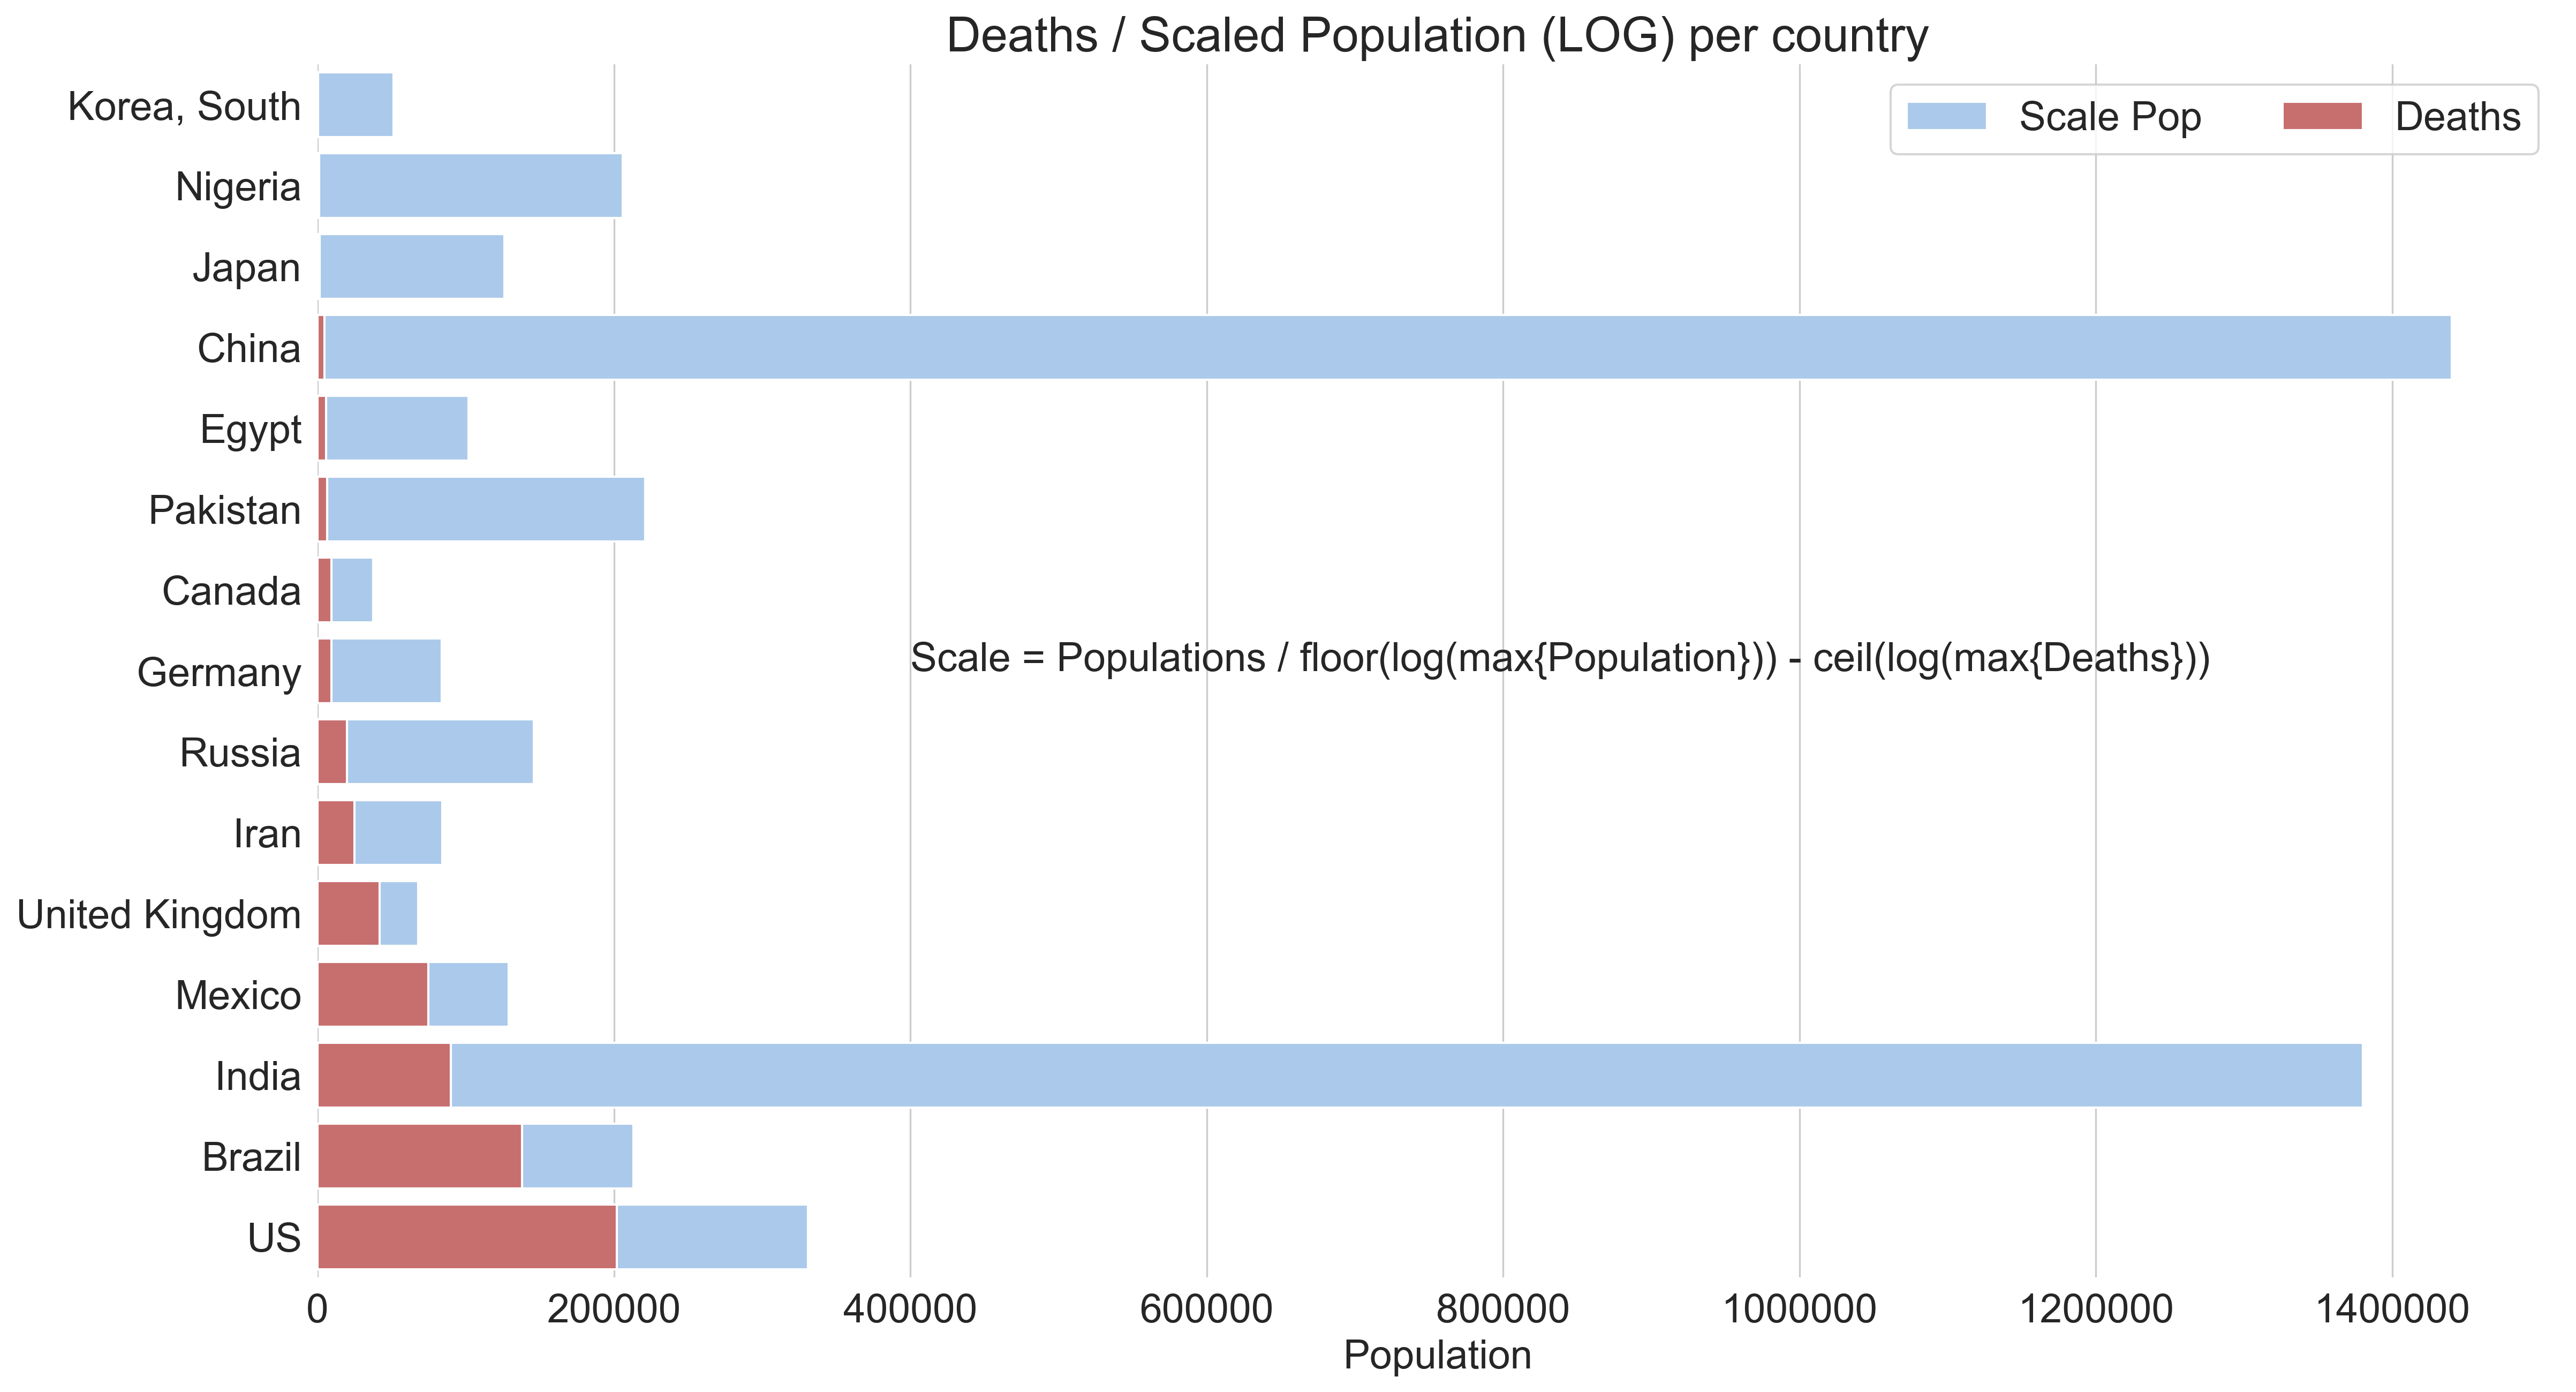

In [36]:
fig2, cplt2 = plt.subplots(figsize = (18,10), dpi = 300)

sns.set_style("whitegrid")

sns.set_color_codes("pastel")

sns.barplot(data = df_plt_scale,
                    x = 'Scale Population',
                    y = 'Country',
                    color = 'b',
                    label = 'Scale Pop'
                       )

sns.set_color_codes("muted")

sns.barplot(data = df_plt_scale,
                   x = 'Deaths',
                   y = 'Country',
                   color = 'r',
                   label = 'Deaths')

cplt2.legend(ncol=2, loc="upper right", frameon = True)
cplt2.text(400000,7,'Scale = Populations / floor(log(max{Population})) - ceil(log(max{Deaths}))')
cplt2.set(ylabel = "",
         xlabel = "Population",
         title = "Deaths / Scaled Population (LOG) per country")
sns.despine(left = True, bottom = True)

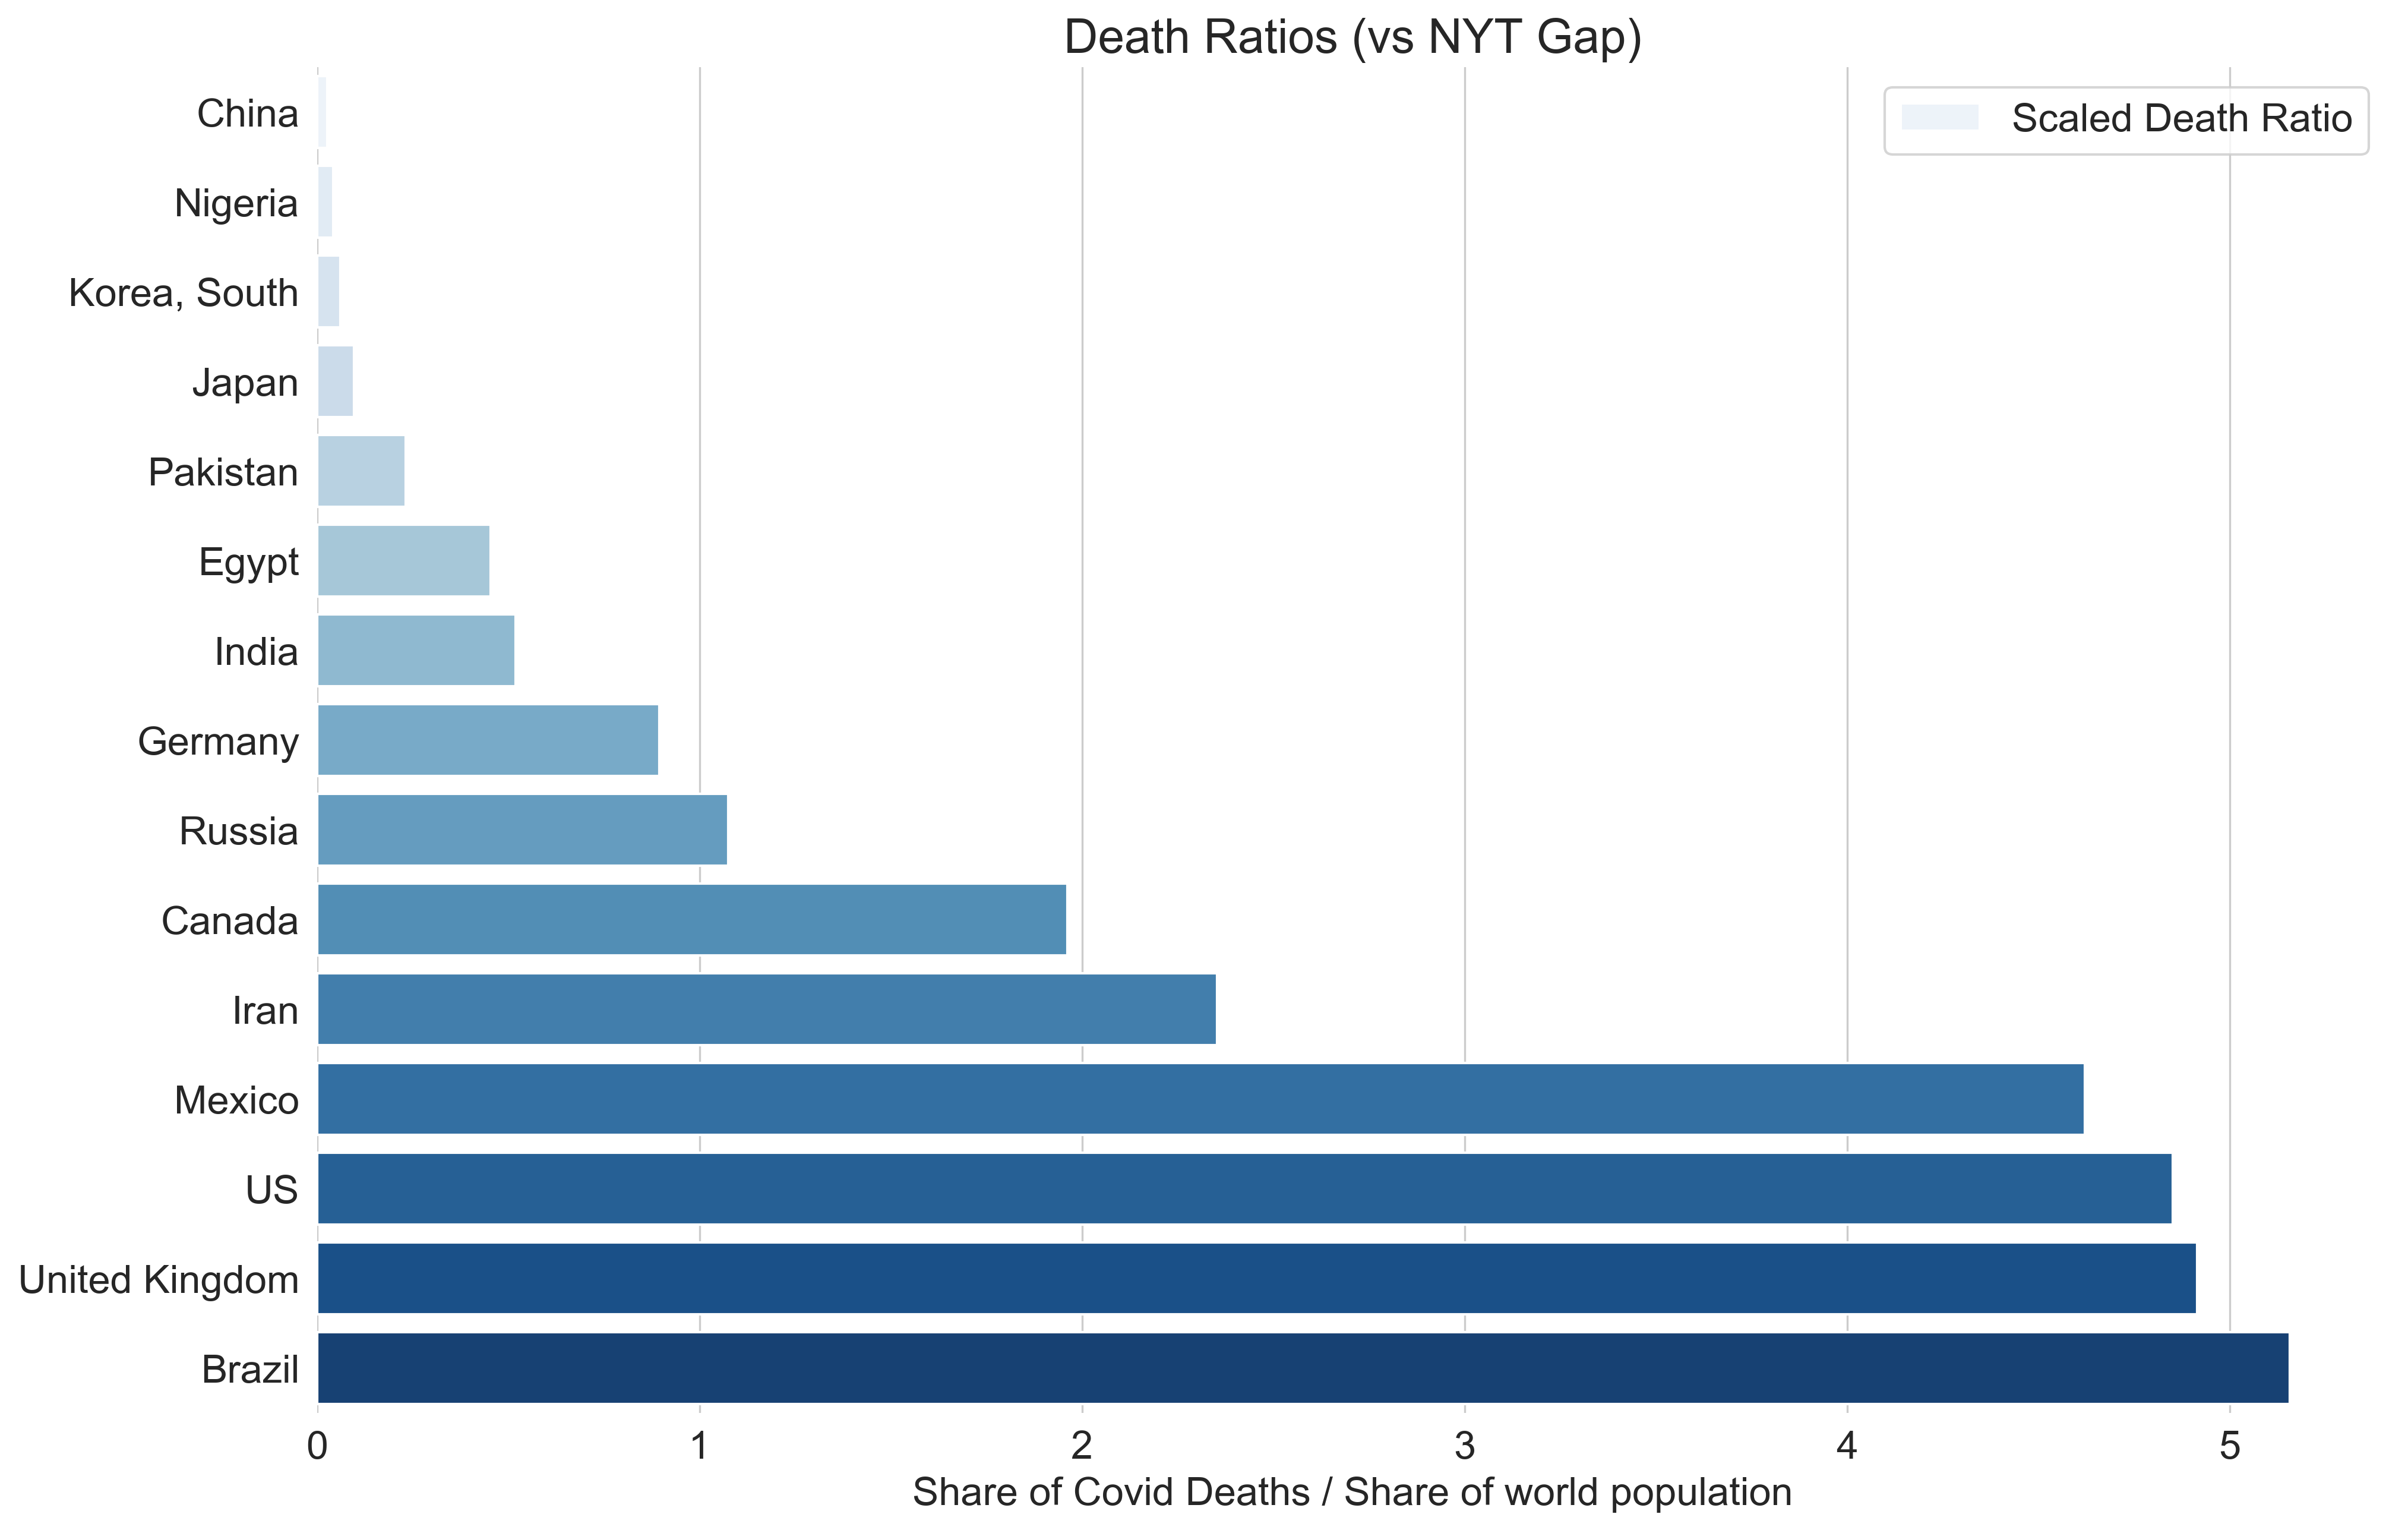

In [37]:
plt.rc('font', size = 16)
fig2, cplt2 = plt.subplots(figsize = (15,10), dpi = 300)
poo = sns.color_palette("Reds",len(df_plt_2))
poo2 = sns.color_palette("Blues",len(df_plt_2))

sns.set_style("whitegrid")

sns.barplot(data = df_plt_2,
                   x = '[Countr/WorldD]/[Countr/WorldP]',
                   y = 'Country',
                   palette = poo2,
                   label = 'Scaled Death Ratio')

sns.set_color_codes("pastel")

#sns.barplot(data = df_plt_2,
#                    x = 'Death Gap',
#                    y = 'Country',
#                    palette = poo,
#                    label = 'Death Gap',
#                    alpha = .2
#           )

cplt2.legend(ncol=2, loc="upper right", frameon = True)
cplt2.set(ylabel = "",
          xlabel = "Share of Covid Deaths / Share of world population",
          title = "Death Ratios (vs NYT Gap)" )
sns.despine(left = True, bottom = True)

In [38]:
df_pltTS = df_covTS.iloc[0:len(df_covTS)-1]

In [39]:
np.arange(df_pltTS.shape[0])[::7]

array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
       182, 189, 196, 203, 210, 217, 224, 231, 238, 245])

In [40]:
#remove selctions to clean up line plot
sel_rem = {'Canada', 'Nigeria','Japan','Pakistan','Egypt'}
selections2 = selections.difference(sel_rem)

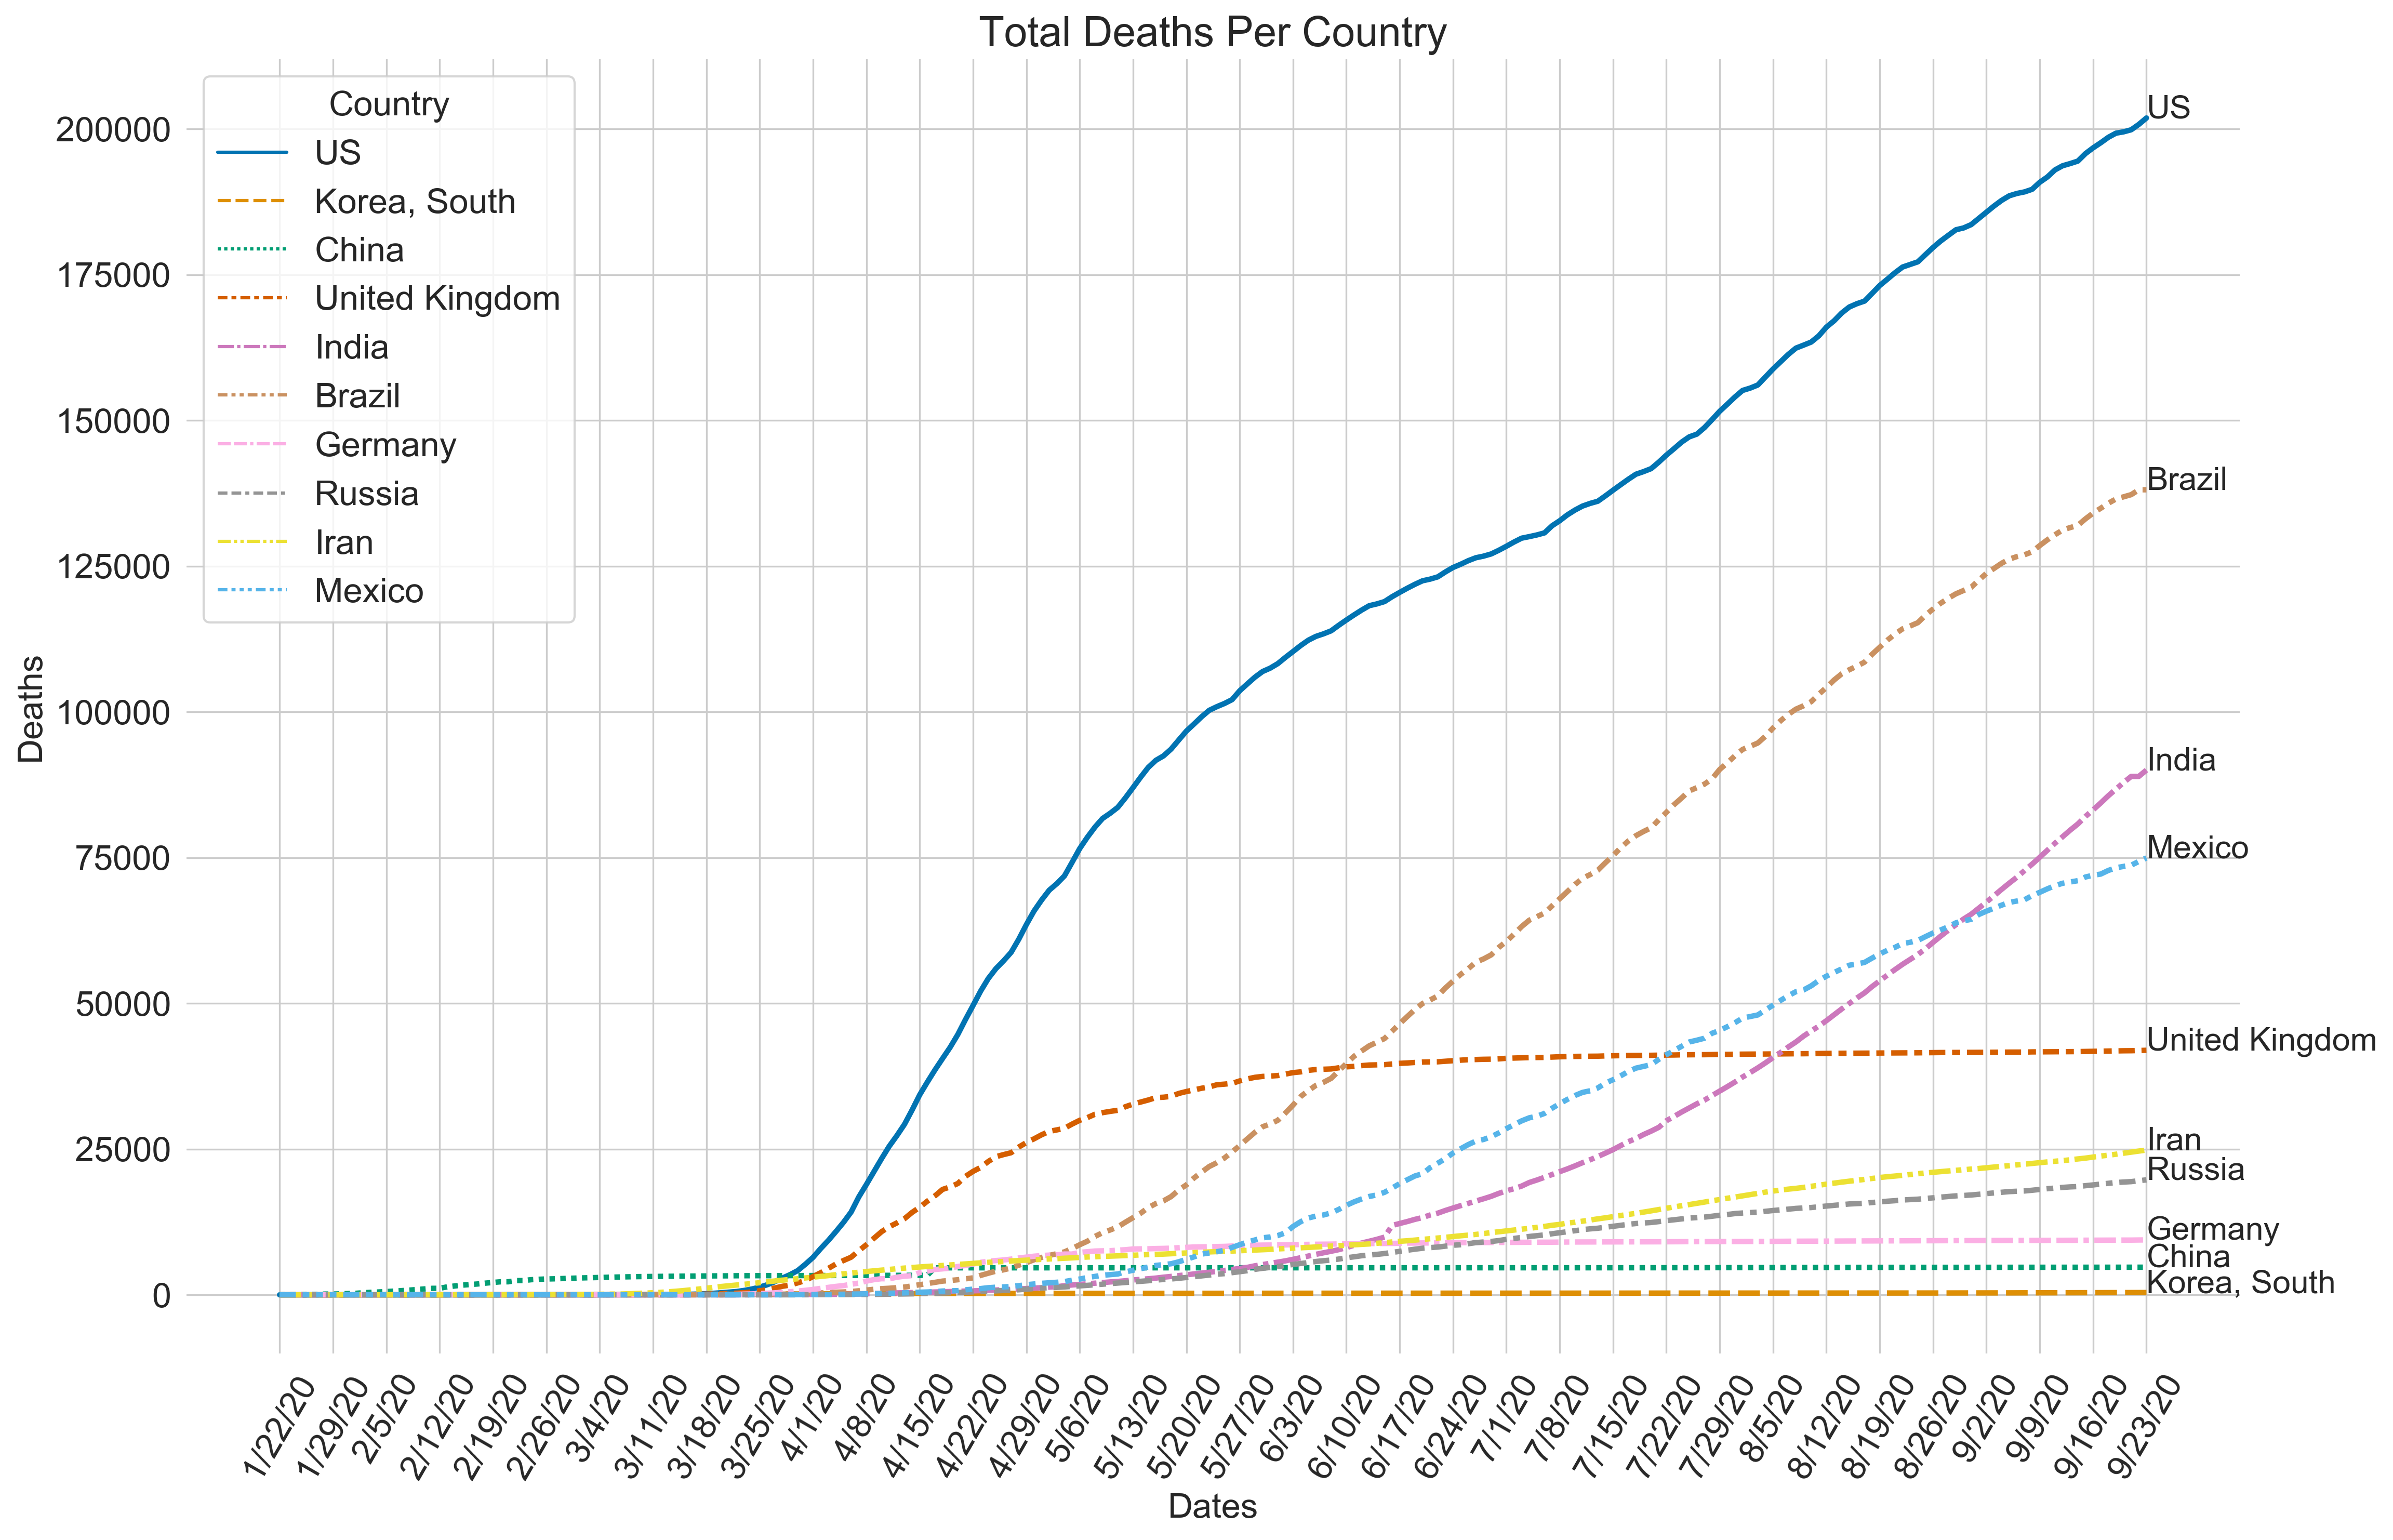

In [62]:
cplt_TS = plt.figure(figsize = (17,11), dpi = 300)
sns.set_style(style = "whitegrid")
plt.rc('font', size = 16)

plt.xticks(np.arange(df_pltTS.shape[0])[::7], df_pltTS.Date[::7], rotation=60)

cplt_TS = sns.lineplot(data = df_pltTS[selections2].astype(int), linewidth = 2.5, palette = "colorblind")

cplt_TS.set(xlabel = "Dates",
            ylabel = "Deaths",
            title = "Total Deaths Per Country")

for i, poo in enumerate(df_pltTS[selections2]):
    cplt_TS.text(len(df_pltTS.index)-1, df_pltTS[poo][len(df_pltTS.index)-1], poo, fontsize = 15)
    sns.despine(left = True, bottom = True)

In [42]:
for poo in selections2:
    lsty = list()
    for i, bla in enumerate(TD_tol):
        lsty = lsty + [( df_pltTS[poo][i] / TD_tol[i]) / ( (df_covTS[poo][df_covTS.shape[0]-1]) / w_pop )]
        continue
    df_pltTS.insert(len(df_pltTS.columns), poo + ' SDR', lsty)

In [43]:
selections3 = set()
for i in selections2:
    selections3.update({i + ' SDR'})
#selections3

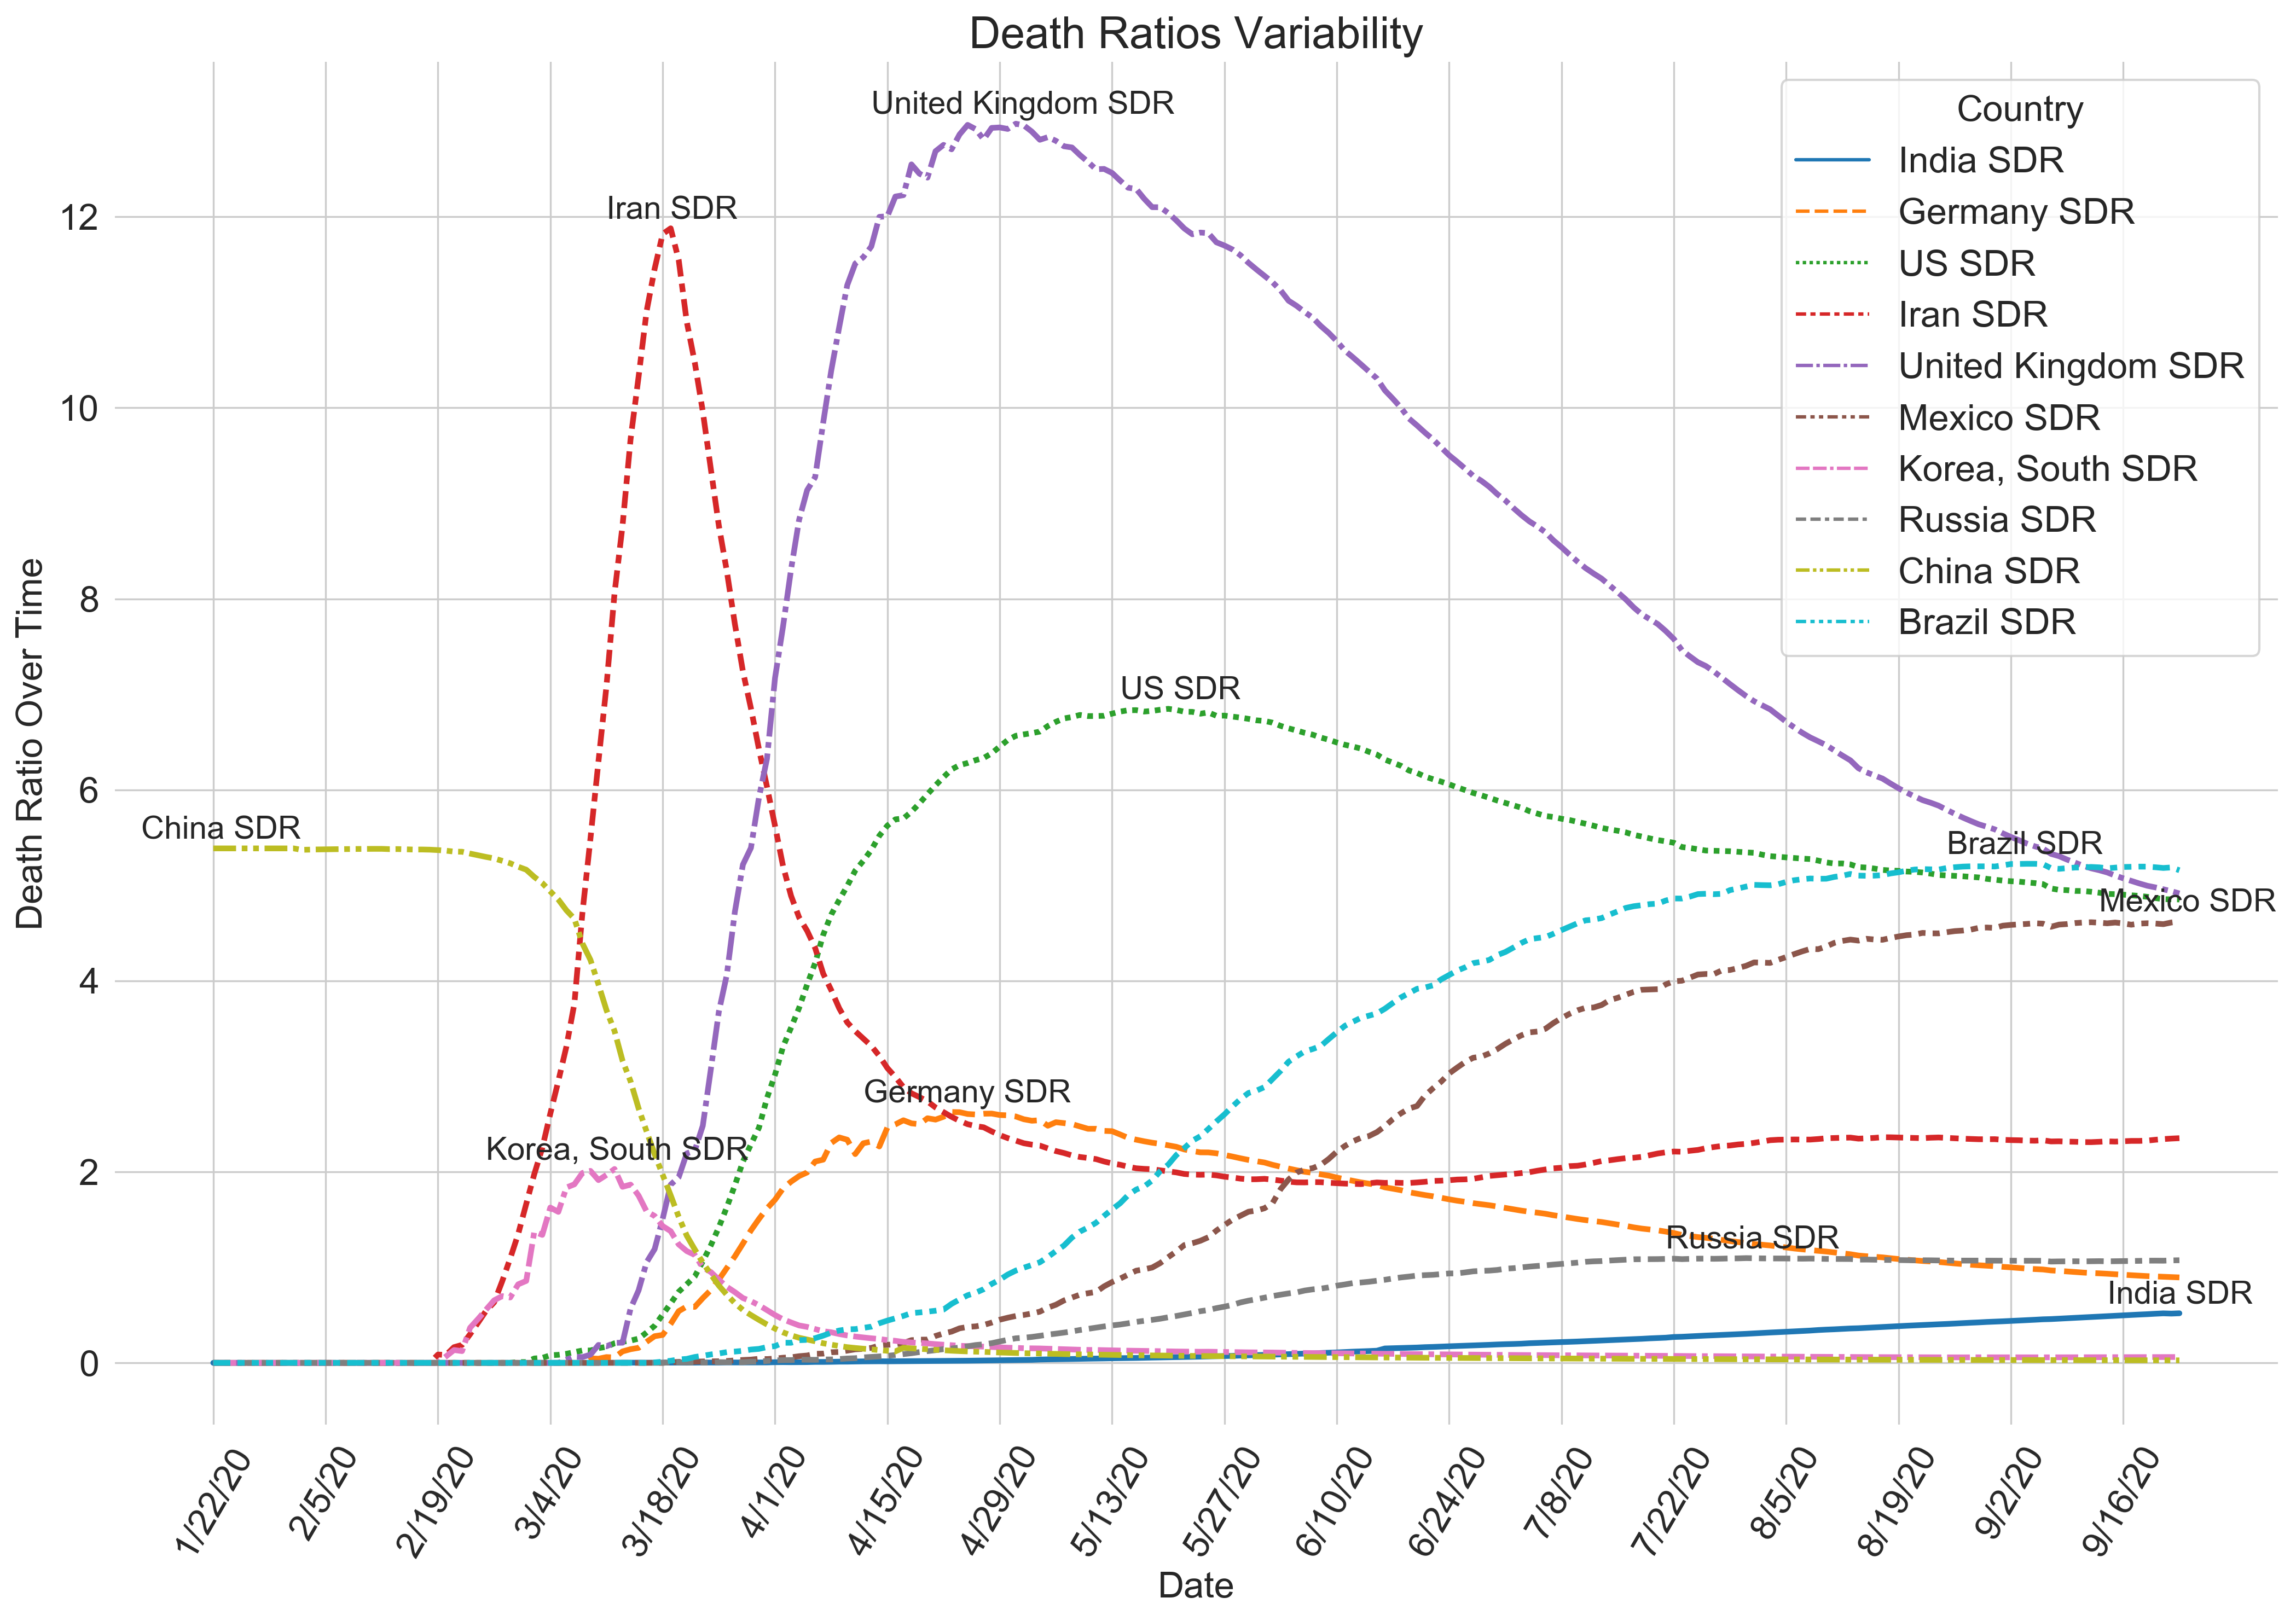

In [44]:
cplt_TS2 = plt.figure(figsize = (17,11), dpi = 300)
sns.set_style(style = "whitegrid")
plt.rc('font', size = 16)

plt.xticks(np.arange(df_pltTS.shape[0])[::14], df_pltTS.Date[::14], rotation=60)

cplt_TS2 = sns.lineplot(data = df_pltTS[selections3].astype(float), linewidth = 2.5)

cplt_TS2.set(xlabel = "Date",
            ylabel = "Death Ratio Over Time",
            title = "Death Ratios Variability")

for i, poo in enumerate(df_pltTS[selections3]):
    x = df_pltTS[df_pltTS[poo] == df_pltTS[poo].max()].index.to_list()
    y = df_pltTS[poo].max()
    cplt_TS2.text(x.pop(0)-len(poo), y+.1, poo, fontsize = 14)
sns.despine(left = True, bottom = True)

In [45]:
for poo in selections2:
    lsty = list()
    for i, bla in enumerate(TD_tol):
        lsty = lsty + [(df_pltTS[poo][i] / TD_tol[i]) - (df_covTS[poo][df_covTS.shape[0]-1] / w_pop)]
        continue
    df_pltTS.insert(len(df_pltTS.columns), poo + ' GAP', lsty)

In [46]:
selections4 = set()
for i in selections2:
    selections4.update({i + ' GAP'})
selections4

{'Brazil GAP',
 'China GAP',
 'Germany GAP',
 'India GAP',
 'Iran GAP',
 'Korea, South GAP',
 'Mexico GAP',
 'Russia GAP',
 'US GAP',
 'United Kingdom GAP'}

In [47]:
df_pltTS

Country     Date Afghanistan Albania Algeria Andorra Angola  \
0        1/22/20           0       0       0       0      0   
1        1/23/20           0       0       0       0      0   
2        1/24/20           0       0       0       0      0   
3        1/25/20           0       0       0       0      0   
4        1/26/20           0       0       0       0      0   
..           ...         ...     ...     ...     ...    ...   
241      9/19/20        1437     358    1665      53    147   
242      9/20/20        1441     362    1672      53    152   
243      9/21/20        1444     364    1679      53    154   
244      9/22/20        1445     367    1689      53    155   
245      9/23/20        1446     370    1698      53    159   

Country Antigua and Barbuda Argentina Armenia Australia  ...    US GAP  \
0                         0         0       0         0  ... -0.042674   
1                         0         0       0         0  ... -0.042674   
2                         0         0       0         0  ... -0.042674   
3                         0         0       0         0  ... -0.042674   
4                         0         0       0         0  ... -0.042674   
..                      ...       ...     ...       ...  ...       ...   
241                       3     12799     928       849  ...  0.165563   
242                       3     13053     930       851  ...  0.164998   
243                       3     13482     936       854  ...  0.164495   
244                       3     13952     938       859  ...  0.164420   
245                       3     14376     942       861  ...  0.164365   

Country Korea, South GAP China GAP United Kingdom GAP India GAP Brazil GAP  \
0              -0.006614  0.814349          -0.008754 -0.177915  -0.027461   
1              -0.006614  0.814349          -0.008754 -0.177915  -0.027461   
2              -0.006614  0.814349          -0.008754 -0.177915  -0.027461   
3              -0.006614  0.814349          -0.008754 -0.177915  -0.027461   
4              -0.006614  0.814349          -0.008754 -0.177915  -0.027461   
..                   ...       ...                ...       ...        ...   
241            -0.006214 -0.180701           0.034974 -0.087265   0.115206   
242            -0.006213 -0.180720           0.034825 -0.086438   0.115035   
243            -0.006212 -0.180740           0.034653 -0.085730   0.114827   
244            -0.006214 -0.180765           0.034477 -0.086186   0.114983   
245            -0.006211 -0.180792           0.034268 -0.085597   0.114170   

Country Germany GAP Russia GAP  Iran GAP Mexico GAP  
0         -0.010804  -0.018823 -0.010830  -0.016631  
1         -0.010804  -0.018823 -0.010830  -0.016631  
2         -0.010804  -0.018823 -0.010830  -0.016631  
3         -0.010804  -0.018823 -0.010830  -0.016631  
4         -0.010804  -0.018823 -0.010830  -0.016631  
..              ...        ...       ...        ...  
241       -0.000994   0.001313  0.014372   0.059919  
242       -0.001030   0.001318  0.014466   0.059869  
243       -0.001071   0.001307  0.014543   0.059759  
244       -0.001103   0.001367  0.014601   0.060053  
245       -0.001140   0.001401  0.014645   0.060231  

[246 rows x 195 columns]

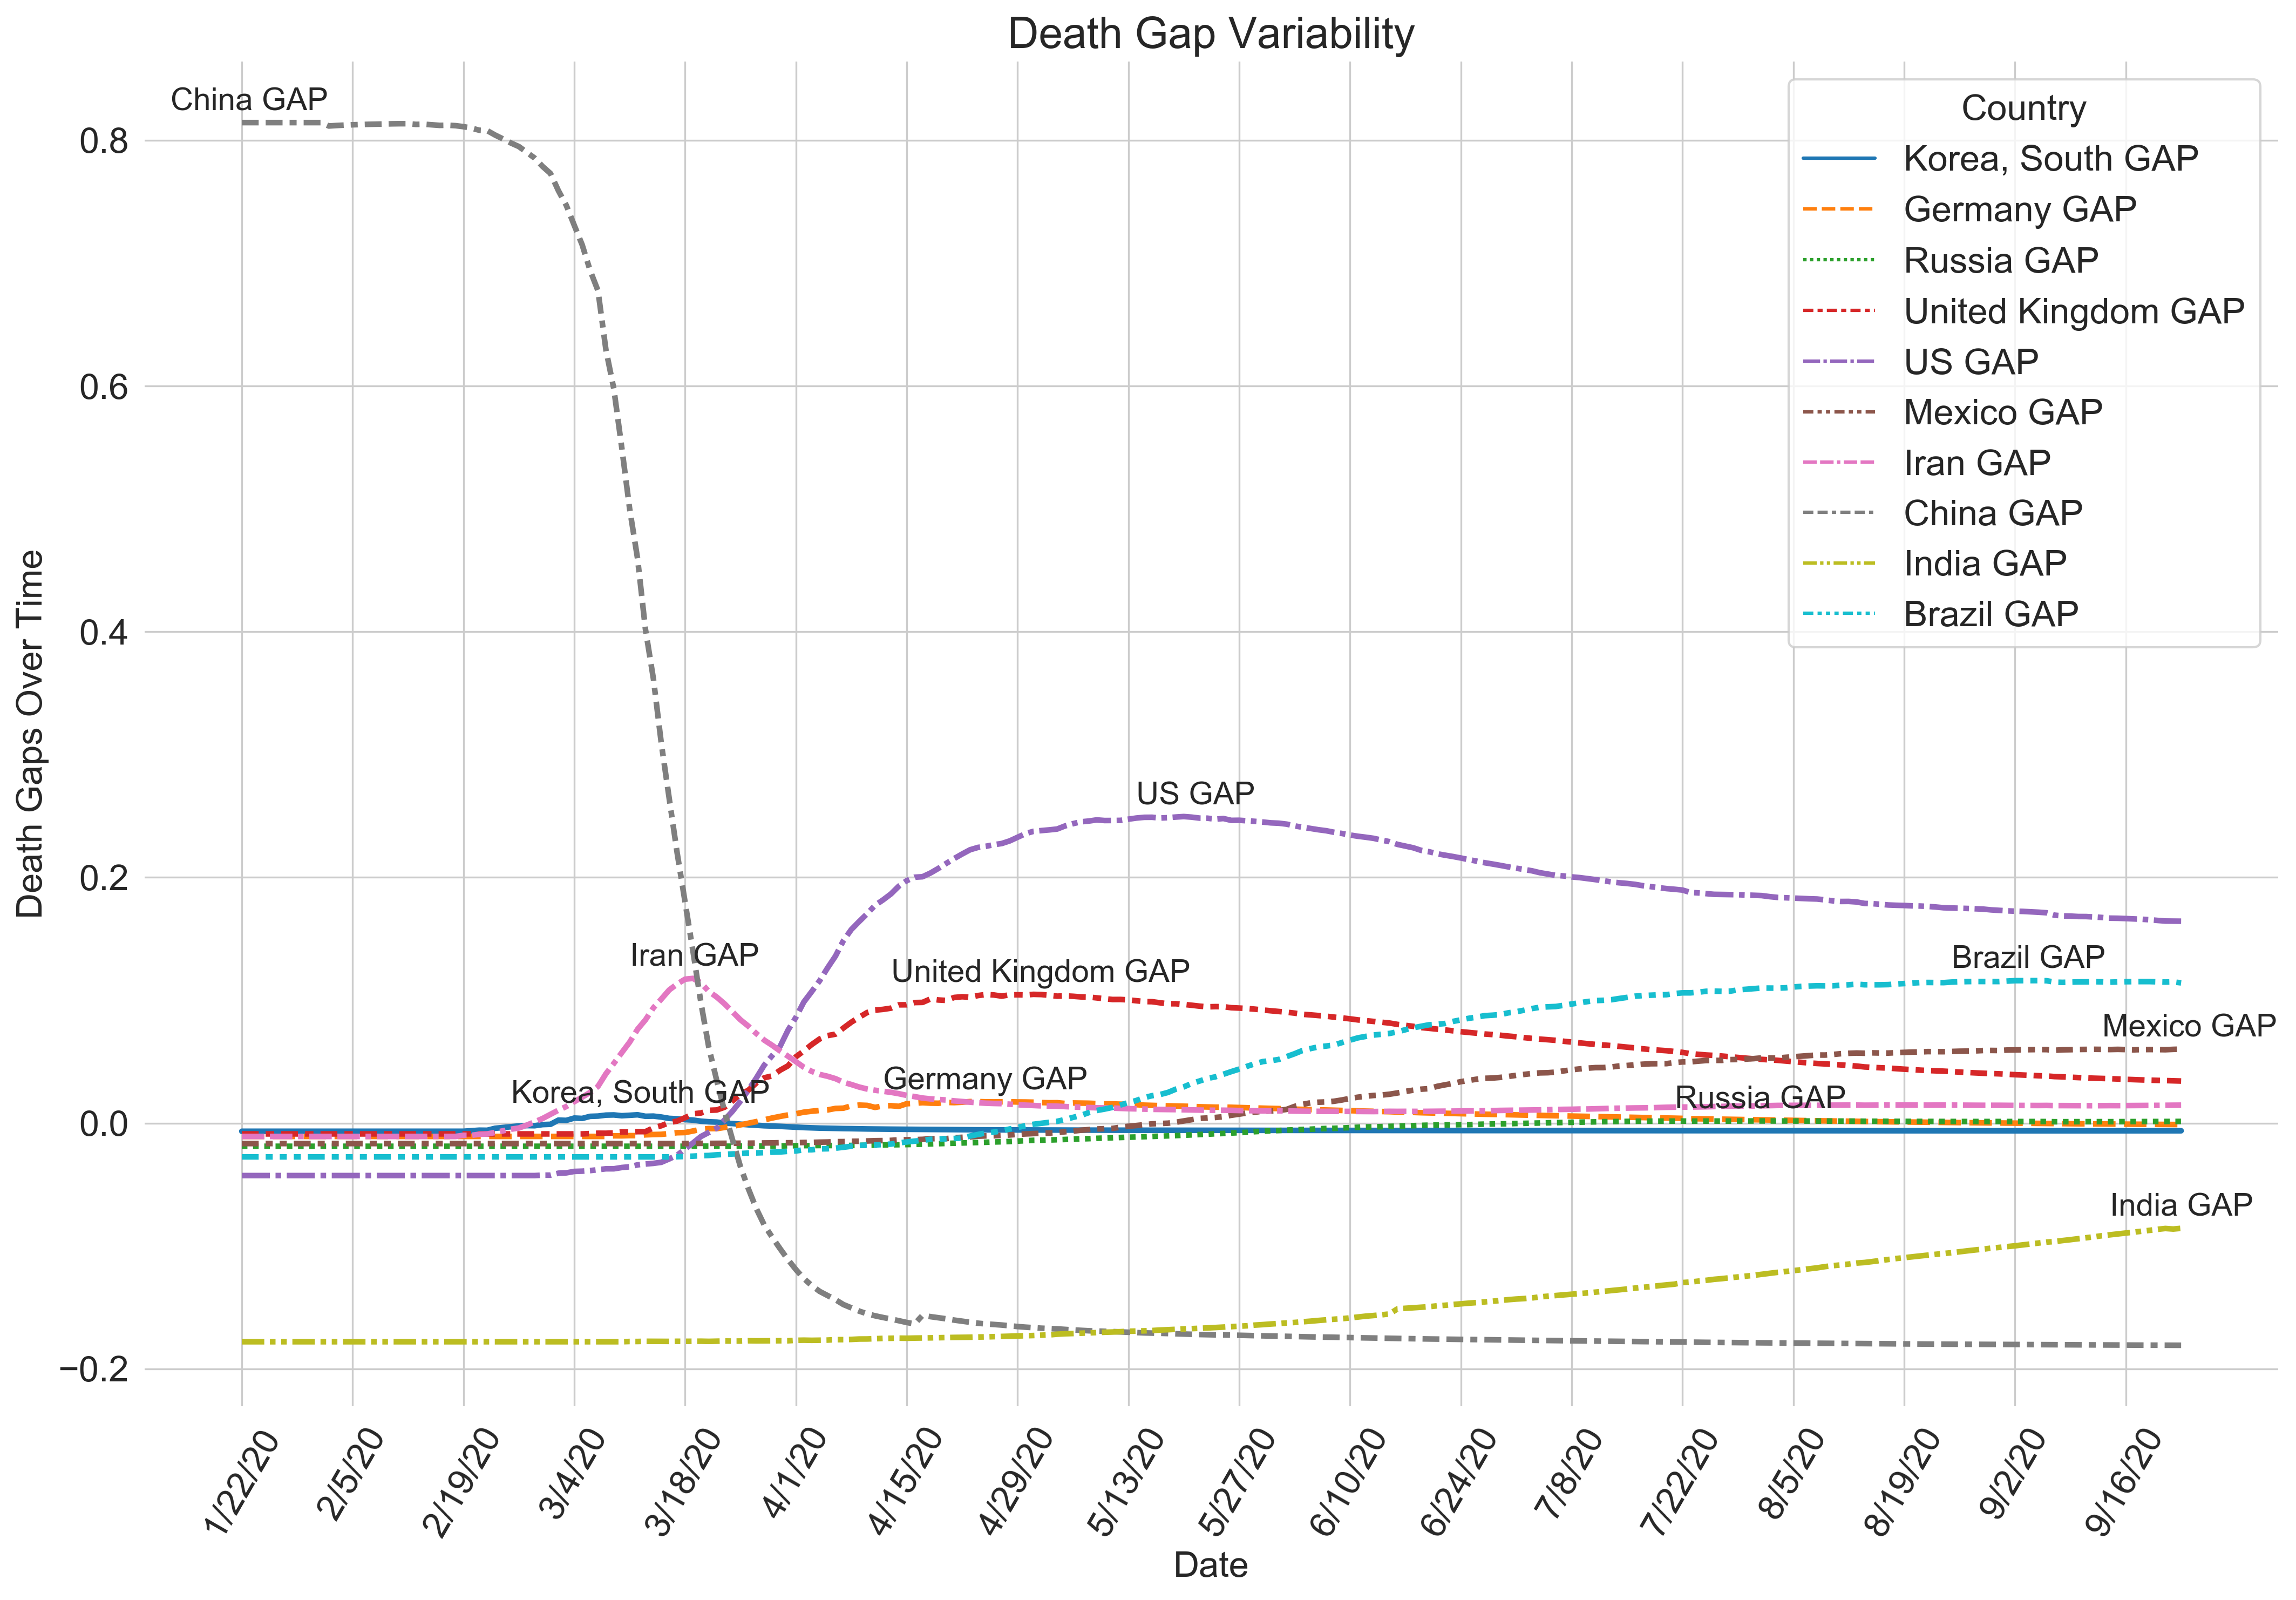

In [48]:
cplt_TS2 = plt.figure(figsize = (17,11), dpi = 300)
sns.set_style(style = "whitegrid")
plt.rc('font', size = 16)

plt.xticks(np.arange(df_pltTS.shape[0])[::14], df_pltTS.Date[::14], rotation=60)

cplt_TS2 = sns.lineplot(data = df_pltTS[selections4].astype(float), linewidth = 2.5)

cplt_TS2.set(xlabel = "Date",
            ylabel = "Death Gaps Over Time",
            title = "Death Gap Variability")

for i, poo in enumerate(df_pltTS[selections4]):
    x = df_pltTS[df_pltTS[poo] == df_pltTS[poo].max()].index.to_list()
    y = df_pltTS[poo].max()
    cplt_TS2.text(x.pop(0)-len(poo), y+.01, poo, fontsize = 14)
sns.despine(left = True, bottom = True)